# Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("kc_house_data.csv")

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df.shape

(21613, 21)

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df['sqft_basement'].value_counts()

0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\ahmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


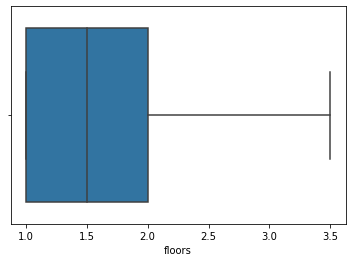

In [11]:
sns.boxplot(df["floors"]);

In [12]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
df["yr_home"]=2022-df["yr_built"]

In [15]:
df["zipcode"]=df["zipcode"].astype("category")
#zipcodeları yani posta kodlarının birbirine üstünlüğü yok işte bu sebeple bunu category stiline alıyoruzki rahatça dummy variable yapabilelim

In [16]:
abs(df.corr()["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_home          0.054012
yr_built         0.054012
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

In [17]:
df["yr_home"]

0        67
1        71
2        89
3        57
4        35
         ..
21608    13
21609     8
21610    13
21611    18
21612    14
Name: yr_home, Length: 21613, dtype: int64

In [18]:
df = df[df["sqft_living15"]<3500]
df = df[df["sqft_living"]<4000]
df = df[df["bathrooms"]<4]
df = df[df["sqft_above"]<3750]
df = df[df["bedrooms"]<8]
df = df[df["yr_home"]<80]

In [19]:
df["bedrooms"]=df["bedrooms"]**3
df["bathrooms"]=df["bathrooms"]**2
df["floors"]=df["floors"]*2
df["grade"]=df["grade"]*2

df["sqft_living"]=df["sqft_living"]**3
df["waterfront"]=df["waterfront"]**2
df["view"]=df["view"]**2
df["sqft_above"]=df["sqft_above"]**2
df["sqft_living15"]=df["sqft_living15"]**2


In [88]:


x,y=df[["bathrooms","sqft_living15","bedrooms","sqft_above","floors","zipcode","grade","sqft_living","view","waterfront","yr_home","sqft_basement"]],df[["price"]]


In [89]:
abs(df.corr()["price"]).sort_values(ascending=False)

price            1.000000
grade            0.637710
sqft_living      0.610589
sqft_living15    0.548896
sqft_above       0.494609
bathrooms        0.447879
lat              0.396365
view             0.322133
bedrooms         0.231186
sqft_basement    0.229766
floors           0.212653
waterfront       0.198910
yr_home          0.144134
yr_built         0.144134
yr_renovated     0.106176
sqft_lot         0.078955
sqft_lot15       0.066650
long             0.055577
condition        0.016174
id               0.004293
Name: price, dtype: float64

In [90]:
x=pd.get_dummies(x,drop_first=True)


In [91]:
#bu sadece jupyter notebook a özel py uzantılı bi şeyde bunu yazmaya gerek yok
#%matplotlib inline

In [92]:
x.head()

,bathrooms,sqft_living15,bedrooms,sqft_above,floors,grade,sqft_living,view,waterfront,yr_home,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1.0000,1795600,27,1392400,2.0,14,1643032000,0,0,67,...,0,0,0,0,0,0,1,0,0,0
1,5.0625,2856100,27,4708900,4.0,14,16974593000,0,0,71,...,0,0,0,0,0,0,0,0,0,0
3,9.0000,1849600,64,1102500,2.0,14,7529536000,0,0,57,...,0,0,0,0,0,0,0,0,0,0
4,4.0000,3240000,27,2822400,2.0,16,4741632000,0,0,35,...,0,0,0,0,0,0,0,0,0,0
6,5.0625,5008644,27,2941225,4.0,14,5044200875,0,0,27,...,0,0,0,0,0,0,0,0,0,0


In [93]:
y.head()

,price
0,221900.0
1,538000.0
3,604000.0
4,510000.0
6,257500.0


In [94]:
y.shape


(16650, 1)

# LinearRegression

In [95]:
from sklearn.linear_model import LinearRegression  # SK=Sciene Kit , sciene kit learn,es kay learn
from sklearn.model_selection import train_test_split#verinin %80 ile train , %20 ile doğrulama yapıyoruz

In [96]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=13)#test_size yerine train_sizedesek ve train_size=0.80 desek aynı şey olur
    #random state= rastgele seçtiğimiz veriler değişmesin diye

In [97]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((13320, 80), (13320, 1), (3330, 80), (3330, 1))

In [98]:
lr = LinearRegression()
regmodel = lr.fit(x_train,y_train) # model x_train verisine bakıp y_train verisine göre öğreniyor

In [99]:
y_pretest=regmodel.predict(x_test)#öğrenen model x_test verileri ile tahmin ediyoruz
y_pretest

array([[361686.47246457],
       [734681.09884991],
       [223468.11494977],
       ...,
       [235067.11562581],
       [689684.19210221],
       [224846.29044853]])

In [100]:
from sklearn.metrics import mean_squared_error,r2_score#r^2%80 üzeri ise başarılıdır

In [101]:
(mean_squared_error(y_test,y_pretest))**0.5

107480.91997654468

In [102]:
r2_score(y_test,y_pretest)

0.8061063431434183

In [103]:
##x,y=df[["Mileage","Cylinder","Liter","Cruise","Make","Trim"]],df["Price"]

In [104]:
##x.head()

In [105]:
#marka model yazmadık düşük çıkmıştı ama bunlar object o yüzden bunları get dummies yapıyoruz
#
##x=pd.get_dummies(x,drop_first=True)
##x.head()

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=13)


# LinearRegression

In [107]:
lr=LinearRegression()
regmodel=lr.fit(x_train,y_train)
y_pretest=regmodel.predict(x_test)
y_pretest

array([[362966.62988919],
       [736786.58838694],
       [223789.64762557],
       ...,
       [485551.05222548],
       [221945.75033605],
       [358532.27048018]])

In [108]:
(mean_squared_error(y_test,y_pretest))**0.5

106292.91881251431

In [109]:
r2_score(y_test,y_pretest)

0.8025650696000427

In [110]:
#bu model iyi fakat bir modelden bakmak yemez başka modellerede bakmak lazım 
#Ridge ve Lasso gibi

# Lasso & Ridge

In [111]:
from sklearn.linear_model import Ridge ,Lasso

In [112]:
#Ridge hataların karesini alıyor onları hataları büyütmeye çalışıyorve ona göre hatayı azaltmaya çalışıyor
#Lasso hataların mutlak değerini alıyor. ona göre

In [113]:
R=Ridge()
R.fit(x_train,y_train)
y_pred_ridge=R.predict(x_test)

C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.36735e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [114]:
y_pred_ridge

array([[363091.54086024],
       [737897.49033673],
       [265708.63385206],
       ...,
       [483648.92585932],
       [220023.93683255],
       [358885.09693564]])

In [115]:
(mean_squared_error(y_test,y_pred_ridge))**0.5

106652.51256768682

In [116]:
r2_score(y_test,y_pred_ridge)

0.8012269473472641

In [117]:
 #Lasso Regression

In [118]:
L=Lasso()
L.fit(x_train,y_train)
y_pred_lasso=L.predict(x_test)

In [119]:
(mean_squared_error(y_pred_lasso,y_test))**0.5

106304.63033208787

In [120]:
r2_score(y_test,y_pred_lasso)

0.8025215598260692

In [121]:
#ElasticNet
#ElasticNet hem Ridge hem Lasso ya bakıyor


# ElasticNet

In [122]:
from sklearn.linear_model import ElasticNet

In [123]:
E=ElasticNet(l1_ratio=0.8)#l1=Lasso,l2=Ridge.....Burda l1den yani Lassodan %80 Ridgeden %20 demek istemiş
#ikisinin en en iyi yanını alıyor

In [124]:
E.fit(x_train,y_train)
y_pred_elastic=E.predict(x_test)

In [125]:
(mean_squared_error(y_pred_elastic,y_test))**0.5

156811.51162940764

In [126]:
r2_score(y_test,y_pred_elastic)

0.5702942078705389

# Extra Tree Regressor

In [127]:
#Extra Tree Regressor
from sklearn.tree import ExtraTreeRegressor
ETR=ExtraTreeRegressor()
ETR.fit(x_train,y_train)
reg_pred_etr= ETR.predict(x_test)

In [128]:
(mean_squared_error(reg_pred_etr,y_test))**0.5

138469.91900230478

In [129]:
r2_score(y_test,reg_pred_etr)

0.664937209312344

# GradientBoostingRegressor (The Best One)

In [142]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor(n_estimators=1000)
GBR.fit(x_train,y_train)
y_pred_gbr=GBR.predict(x_test)

C:\Users\ahmet\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [143]:
(mean_squared_error(y_pred_gbr,y_test))**0.5

94920.35266388647

In [144]:
r2_score(y_test,y_pred_gbr)

0.8425531373100705

# K-Neigbors

In [133]:
#K-Neigbors
from sklearn.neighbors import KNeighborsRegressor
est=KNeighborsRegressor(n_neighbors=10,weights="uniform")
model=est.fit(x_train,y_train)
y_pre_knr=est.predict(x_test)

In [134]:
(mean_squared_error(y_pred_gbr,y_test))**0.5

119164.08605549613

In [135]:
r2_score(y_test,y_pred_gbr)

0.751854674807918